## Ridge vs LS

In [ ]:
%matplotlib inline

### Play with alpha


alpha:  0.1
MSE LS training   : 0.19997652525202272
MSE LS overall    : 1.3330589269490254

MSE Ridge training: 0.2601403691521278
MSE Ridge overall : 0.8185931349477809

alpha:  1
MSE LS training   : 0.19997652525202272
MSE LS overall    : 1.3330589269490254

MSE Ridge training: 0.3862067562087185
MSE Ridge overall : 0.582621997704722

alpha:  5
MSE LS training   : 0.19997652525202272
MSE LS overall    : 1.3330589269490254

MSE Ridge training: 0.42340587589776163
MSE Ridge overall : 0.582117982089684

alpha:  20
MSE LS training   : 0.19997652525202272
MSE LS overall    : 1.3330589269490254

MSE Ridge training: 0.4343136719677243
MSE Ridge overall : 0.5880378567435381

alpha:  30000
MSE LS training   : 0.19997652525202272
MSE LS overall    : 1.3330589269490254

MSE Ridge training: 0.4833570820249078
MSE Ridge overall : 0.5955910800489577


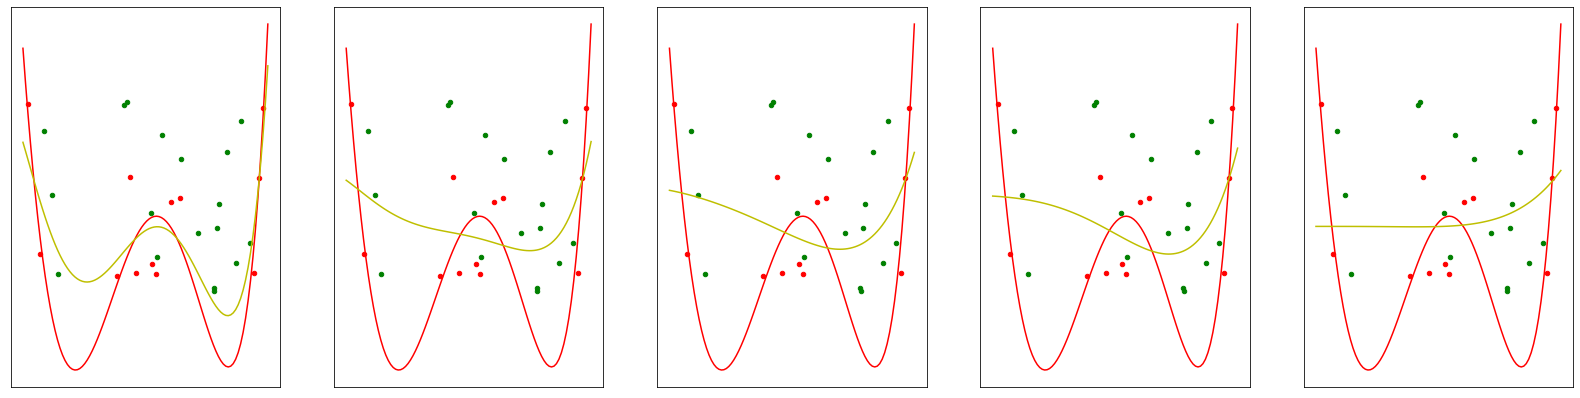

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

# Fungsi Asli
def true_fun(X):
    return np.sin(5 * np.pi * X)

# Buat data sampel di sekitar fungsi asli (ada noise)
np.random.seed(0)

n_samples = 30

X = np.sort(np.random.rand(n_samples))*5
y = true_fun(X) + np.random.randn(n_samples) * 0.1

Xp = np.linspace(0, 5, 100)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.6, random_state = 1)


# Buat model regresi polynomial LS

polynomial_features = PolynomialFeatures(degree=5,include_bias=False)
linear_regression = LinearRegression()
pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
pipeline.fit(X_train[:, np.newaxis], y_train)

plt.figure(figsize=(28, 7))
#Buat model regresi polynomial Ridge
alphas = [0.1, 1, 5, 20, 30000]
for i in range(len(alphas)):
    ax = plt.subplot(1, len(alphas), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    rg = Ridge(alpha=alphas[i])
    piper =  Pipeline([("polynomial_features", polynomial_features),
                             ("Ridge", rg)])
    piper.fit(X_train[:, np.newaxis], y_train)


    #plt.plot(Xp, true_fun(Xp), color = 'b', label="True function")
    plt.plot(Xp, pipeline.predict(Xp[:, np.newaxis]),color = 'r', label='Ridge')
    plt.plot(Xp, piper.predict(Xp[:, np.newaxis]),color = 'y', label='LS')

    plt.scatter(X_train, y_train, color='r', s=20)
    plt.scatter(X_test, y_test, color='g', s=20)

    print('\nalpha: ',alphas[i])
    print("MSE LS training   :", mean_squared_error(y_train, pipeline.predict(X_train[:,np.newaxis])))
    print("MSE LS overall    :", mean_squared_error(y, pipeline.predict(X[:,np.newaxis])))
    print("\nMSE Ridge training:", mean_squared_error(y_train, piper.predict(X_train[:,np.newaxis])))
    print("MSE Ridge overall :", mean_squared_error(y, piper.predict(X[:,np.newaxis])))

plt.show()


### Play with test and train size


 80% test 20% train
MSE LS training   : 3.5611498473064574e-18
MSE LS overall    : 3455499.8787738504

MSE Ridge training: 0.14695711275048853
MSE Ridge overall : 2.347119241674366

 50% test 50% train
MSE LS training   : 0.38571949812831685
MSE LS overall    : 0.7211174316847111

MSE Ridge training: 0.43770684948004307
MSE Ridge overall : 0.5972671845404691

 20% test 80% train
MSE LS training   : 0.49006795692059213
MSE LS overall    : 0.494297409005639

MSE Ridge training: 0.5277976504781554
MSE Ridge overall : 0.5203297214802496


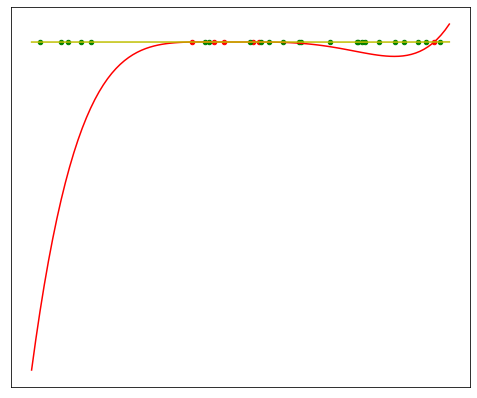

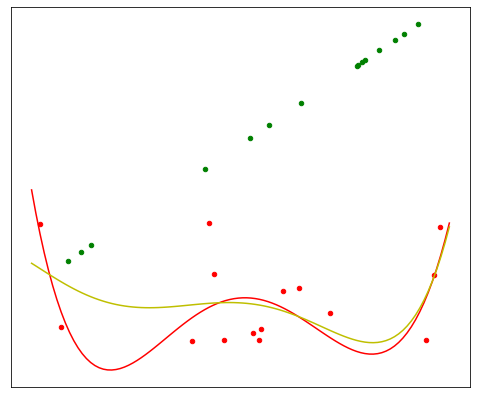

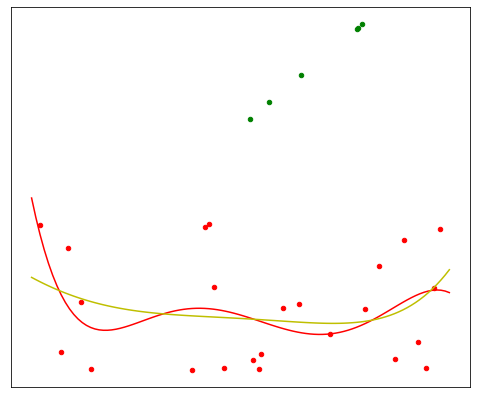

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

# Fungsi Asli
def true_fun(X):
    return np.sin(5 * np.pi * X)

# Buat data sampel di sekitar fungsi asli (ada noise)
np.random.seed(0)

n_samples = 30

X = np.sort(np.random.rand(n_samples))*5
y = true_fun(X) + np.random.randn(n_samples) * 0.1

Xp = np.linspace(0, 5, 100)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size = 0.8, random_state = 1)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size = 0.5, random_state = 1)
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, test_size = 0.2, random_state = 1)

label = ['80% test 20% train', '50% test 50% train', '20% test 80% train']
X_train = [X_train1,X_train2,X_train3]
X_test = [X_test1, X_test2, X_test3] 
y_train = [y_train1,y_train2,y_train3]
y_test = [X_test1, X_test2, X_test3]

# Buat model regresi polynomial LS
for i in range(len(X_train)):
    polynomial_features = PolynomialFeatures(degree=5,include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                             ("linear_regression", linear_regression)])
    pipeline.fit(X_train[i][:, np.newaxis], y_train[i])

    plt.figure(figsize=(28, 7))
    
    #Buat model regresi polynomial Ridge
    ax = plt.subplot(1, len(X_train), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    rg = Ridge(alpha=0.2)
    piper =  Pipeline([("polynomial_features", polynomial_features),
                             ("Ridge", rg)])
    piper.fit(X_train[i][:, np.newaxis], y_train[i])


    #plt.plot(Xp, true_fun(Xp), color = 'b', label="True function")
    plt.plot(Xp, pipeline.predict(Xp[:, np.newaxis]),color = 'r', label='Ridge')
    plt.plot(Xp, piper.predict(Xp[:, np.newaxis]),color = 'y', label='LS')

    plt.scatter(X_train[i], y_train[i], color='r', s=20)
    plt.scatter(X_test[i], y_test[i], color='g', s=20)

    print('\n', label[i])
    print("MSE LS training   :", mean_squared_error(y_train[i], pipeline.predict(X_train[i][:,np.newaxis])))
    print("MSE LS overall    :", mean_squared_error(y, pipeline.predict(X[:,np.newaxis])))
    print("\nMSE Ridge training:", mean_squared_error(y_train[i], piper.predict(X_train[i][:,np.newaxis])))
    print("MSE Ridge overall :", mean_squared_error(y, piper.predict(X[:,np.newaxis])))

plt.show()


### Play with alpha and test size

80% test 20% train and alpha: 0.1
MSE LS training   : 3.5611498473064574e-18
MSE LS overall    : 3455499.8787738504

MSE Ridge training: 0.13897810677077746
MSE Ridge overall : 4.081470729701703


80% test 20% train and alpha: 1
MSE LS training   : 3.5611498473064574e-18
MSE LS overall    : 3455499.8787738504

MSE Ridge training: 0.15920054592646884
MSE Ridge overall : 1.0521684322952045


80% test 20% train and alpha: 5
MSE LS training   : 3.5611498473064574e-18
MSE LS overall    : 3455499.8787738504

MSE Ridge training: 0.16283634453283388
MSE Ridge overall : 0.8647725614123281


80% test 20% train and alpha: 20
MSE LS training   : 3.5611498473064574e-18
MSE LS overall    : 3455499.8787738504

MSE Ridge training: 0.16366652808644302
MSE Ridge overall : 0.823228657469619


80% test 20% train and alpha: 30000
MSE LS training   : 3.5611498473064574e-18
MSE LS overall    : 3455499.8787738504

MSE Ridge training: 0.17909234857084558
MSE Ridge overall : 0.7580525958439528


50% test 50% tr

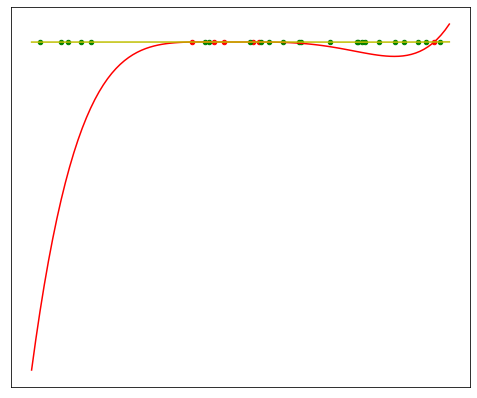

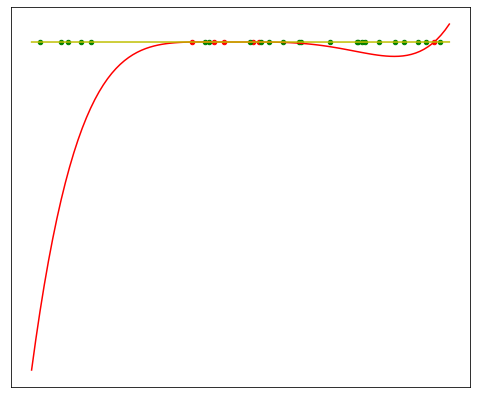

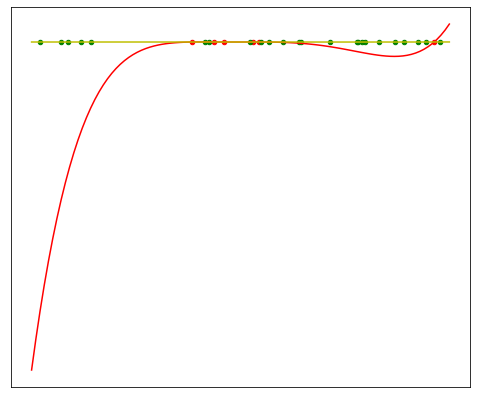

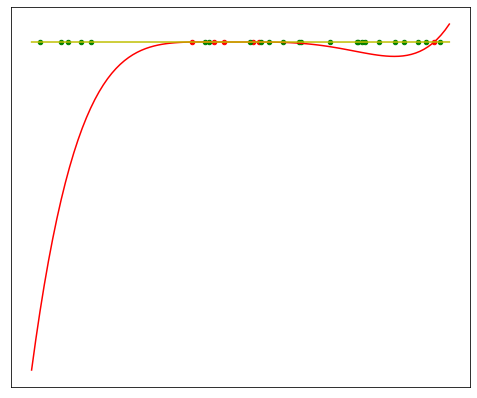

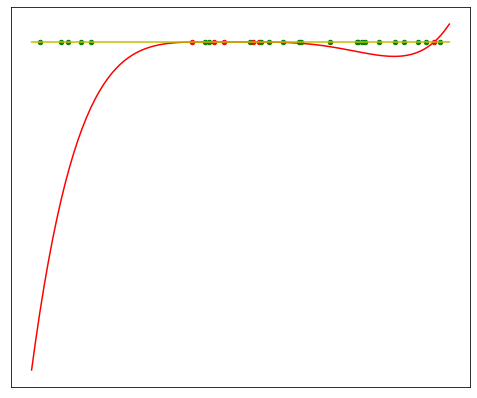

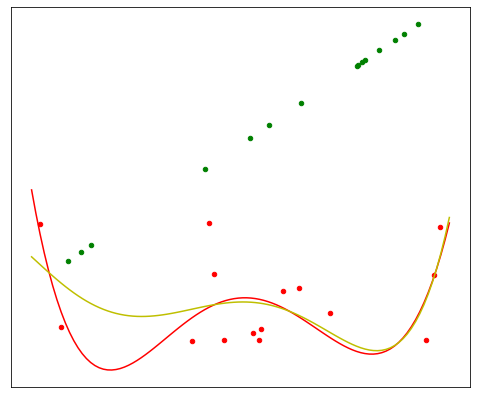

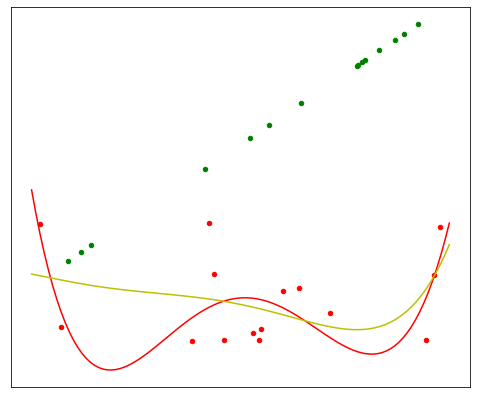

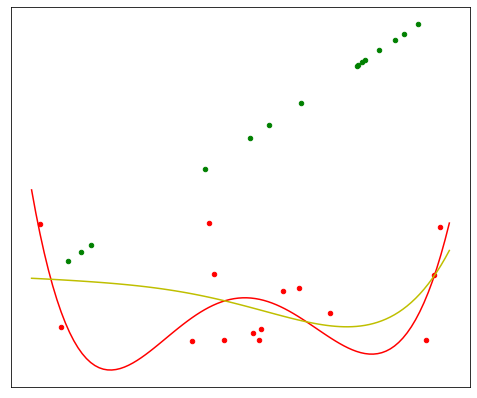

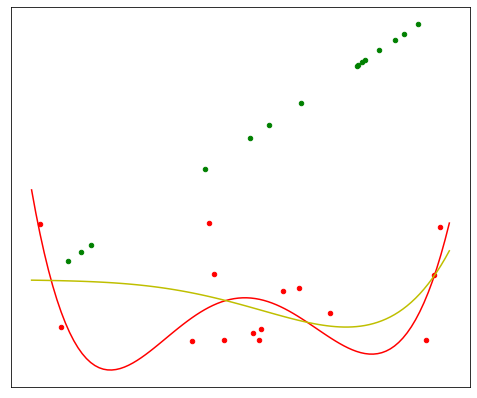

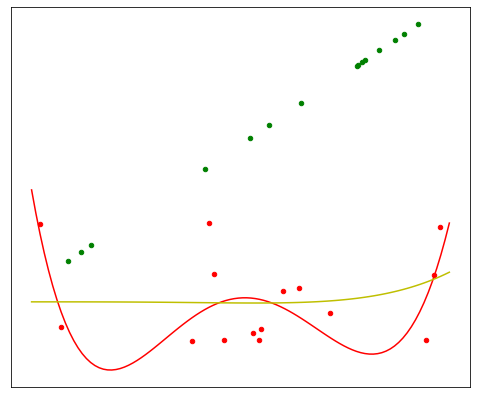

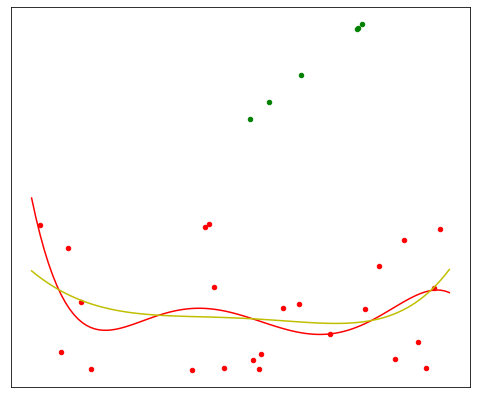

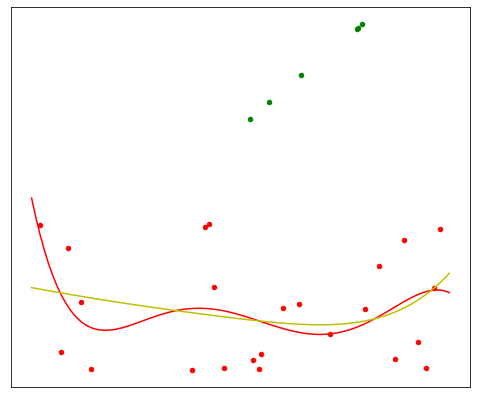

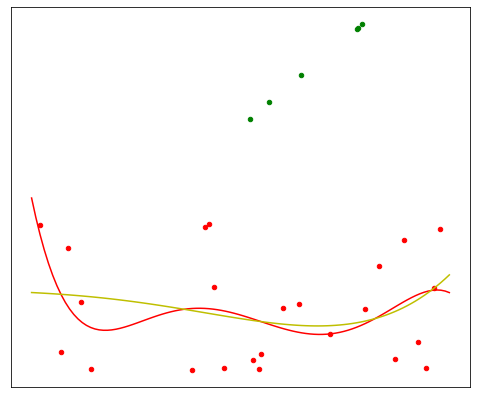

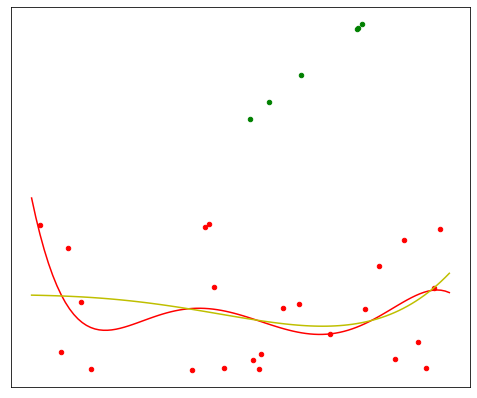

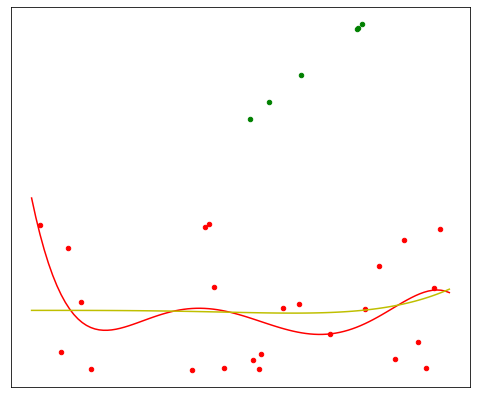

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

# Fungsi Asli
def true_fun(X):
    return np.sin(5 * np.pi * X)

# Buat data sampel di sekitar fungsi asli (ada noise)
np.random.seed(0)

n_samples = 30

X = np.sort(np.random.rand(n_samples))*5
y = true_fun(X) + np.random.randn(n_samples) * 0.1

Xp = np.linspace(0, 5, 100)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size = 0.8, random_state = 1)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size = 0.5, random_state = 1)
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, test_size = 0.2, random_state = 1)

label = ['80% test 20% train', '50% test 50% train', '20% test 80% train']
X_train = [X_train1,X_train2,X_train3]
X_test = [X_test1, X_test2, X_test3] 
y_train = [y_train1,y_train2,y_train3]
y_test = [X_test1, X_test2, X_test3]
alphas = [0.1, 1, 5, 20, 30000]

# Buat model regresi polynomial LS
for i in range(len(X_train)):
    for j in range(len(alphas)):
        polynomial_features = PolynomialFeatures(degree=5,include_bias=False)
        linear_regression = LinearRegression()
        pipeline = Pipeline([("polynomial_features", polynomial_features),
                                 ("linear_regression", linear_regression)])
        pipeline.fit(X_train[i][:, np.newaxis], y_train[i])

        plt.figure(figsize=(28, 7))

        #Buat model regresi polynomial Ridge
        ax = plt.subplot(1, len(X_train), i + 1)
        plt.setp(ax, xticks=(), yticks=())

        rg = Ridge(alpha=alphas[j])
        piper =  Pipeline([("polynomial_features", polynomial_features),
                                 ("Ridge", rg)])
        piper.fit(X_train[i][:, np.newaxis], y_train[i])


        #plt.plot(Xp, true_fun(Xp), color = 'b', label="True function")
        plt.plot(Xp, pipeline.predict(Xp[:, np.newaxis]),color = 'r', label='Ridge')
        plt.plot(Xp, piper.predict(Xp[:, np.newaxis]),color = 'y', label='LS')

        plt.scatter(X_train[i], y_train[i], color='r', s=20)
        plt.scatter(X_test[i], y_test[i], color='g', s=20)

        print('{} and alpha: {}'.format(label[i],alphas[j]))
        print("MSE LS training   :", mean_squared_error(y_train[i], pipeline.predict(X_train[i][:,np.newaxis])))
        print("MSE LS overall    :", mean_squared_error(y, pipeline.predict(X[:,np.newaxis])))
        print("\nMSE Ridge training:", mean_squared_error(y_train[i], piper.predict(X_train[i][:,np.newaxis])))
        print("MSE Ridge overall :", mean_squared_error(y, piper.predict(X[:,np.newaxis])))
        print("\n")

plt.show()


## When is Ridge Better?

Ridge is better when the training set is small. From above, we can see that it's better when the test size 80% and the training size is 20% and 50% 50%.

## When is Ls Better?

LS is better when the training set is large enough when the test size 20% and training size 80%.